In [1]:
!git clone https://github.com/akanametov/PathGAN

In [2]:
cd PathGAN

In [3]:
!wget https://github.com/akanametov/PathGAN/releases/download/1.0/dataset.zip

In [4]:
!unzip dataset.zip

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm

def initialize_weights(layer, mean=0.0, std=0.02):
    if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.ConvTranspose2d):
        torch.nn.init.normal_(layer.weight, mean, std)
    if isinstance(layer, nn.BatchNorm2d):
        torch.nn.init.normal_(layer.weight, mean, std)
        torch.nn.init.constant_(layer.bias, 0)
        
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [6]:
from gan.utils.data import MapPointRegionDataset as MPRDataset

In [7]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [8]:
train_df.head()

,map,task,roi
0,map_23.png,task_64.png,task_64_roi.png
1,map_98.png,task_77.png,task_77_roi.png
2,map_12.png,task_5.png,task_5_roi.png
3,map_87.png,task_86.png,task_86_roi.png
4,map_31.png,task_94.png,task_94_roi.png


In [9]:
test_df.head()

,map,task,roi
0,map_84.png,task_99.png,task_99_roi.png
1,map_11.png,task_18.png,task_18_roi.png
2,map_13.png,task_61.png,task_61_roi.png
3,map_6.png,task_20.png,task_20_roi.png
4,map_43.png,task_92.png,task_92_roi.png


In [10]:
from torchvision.transforms import Compose, ToTensor, ToPILImage, Normalize

In [11]:
transform = Compose([ToTensor(),
                    Normalize(mean=(0.5, 0.5, 0.5),
                              std=(0.5, 0.5, 0.5))])

In [12]:
trainset = MPRDataset(map_dir = 'dataset/maps',
                      point_dir = 'dataset/tasks',
                      roi_dir = 'dataset/tasks',
                      csv_file = train_df,
                      transform = transform)

testset = MPRDataset(map_dir = 'dataset/maps',
                      point_dir = 'dataset/tasks',
                      roi_dir = 'dataset/tasks',
                      csv_file = test_df,
                      transform = transform)

In [13]:
traingen = DataLoader(trainset, batch_size=8, shuffle=True)
testgen = DataLoader(testset, batch_size=8, shuffle=False)

In [70]:
from pix2pix import Generator, Discriminator

In [71]:
from pix2pix.utils import GeneratorLoss, DiscriminatorLoss
#from gan.generator import Generator

generator = Generator().to(device)
discriminator = Discriminator().to(device)

g_criterion = GeneratorLoss()
d_criterion = DiscriminatorLoss()

g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=7e-4, betas=(0.5, 0.999))

print(f'Number of "Generator" params: {sum(p.numel() for p in generator.parameters()):,}')
print(f'Number of "Discriminator" params: {sum(p.numel() for p in discriminator.parameters()):,}')

Number of "Generator" params: 4,170,477
Number of "Discriminator" params: 697,313


In [18]:
from pix2pix.trainer import Trainer

In [19]:
trainer = Trainer(generator = generator,
                 discriminator = discriminator,
                 g_criterion = g_criterion,
                 d_criterion = d_criterion,
                 g_optimizer = g_optimizer,
                 d_optimizer = d_optimizer)

  0%|          | 0/1000 [00:00<?, ?it/s]

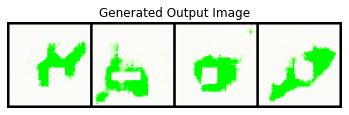

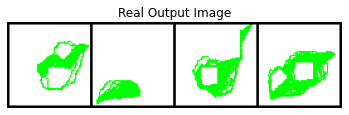

:::::::::::::::::  Epoch 1  :::::::::::::::::
::::::::::: Generator loss: 30.108 :::::::::::
::::::::: Discriminator loss: 0.417 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

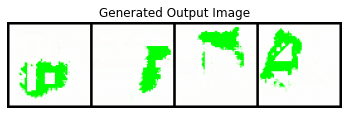

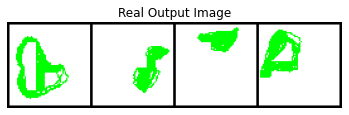

:::::::::::::::::  Epoch 2  :::::::::::::::::
::::::::::: Generator loss: 14.466 :::::::::::
::::::::: Discriminator loss: 0.472 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

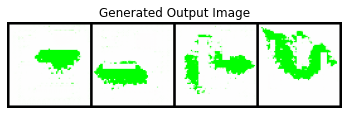

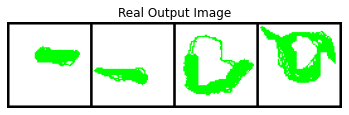

:::::::::::::::::  Epoch 3  :::::::::::::::::
::::::::::: Generator loss: 13.018 :::::::::::
::::::::: Discriminator loss: 0.416 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

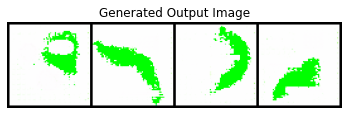

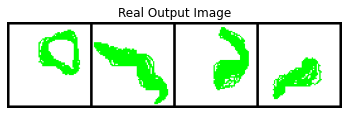

:::::::::::::::::  Epoch 4  :::::::::::::::::
::::::::::: Generator loss: 13.128 :::::::::::
::::::::: Discriminator loss: 0.352 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

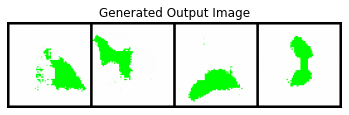

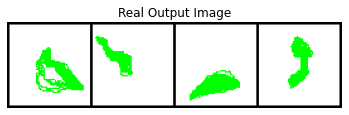

:::::::::::::::::  Epoch 5  :::::::::::::::::
::::::::::: Generator loss: 13.630 :::::::::::
::::::::: Discriminator loss: 0.275 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

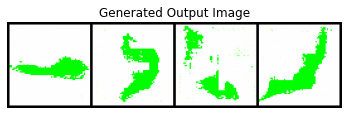

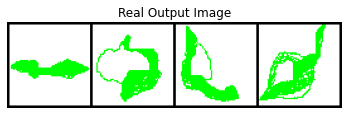

:::::::::::::::::  Epoch 6  :::::::::::::::::
::::::::::: Generator loss: 14.337 :::::::::::
::::::::: Discriminator loss: 0.231 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

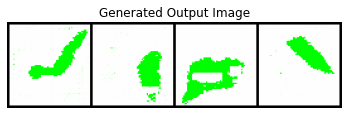

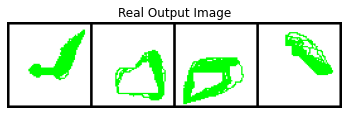

:::::::::::::::::  Epoch 7  :::::::::::::::::
::::::::::: Generator loss: 14.481 :::::::::::
::::::::: Discriminator loss: 0.196 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

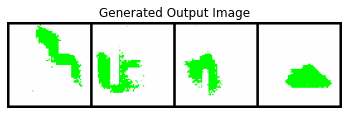

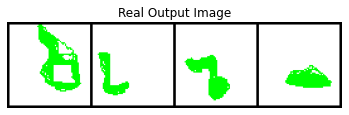

:::::::::::::::::  Epoch 8  :::::::::::::::::
::::::::::: Generator loss: 15.092 :::::::::::
::::::::: Discriminator loss: 0.168 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

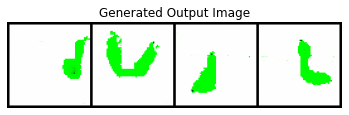

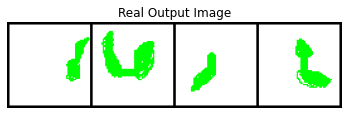

:::::::::::::::::  Epoch 9  :::::::::::::::::
::::::::::: Generator loss: 15.411 :::::::::::
::::::::: Discriminator loss: 0.156 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

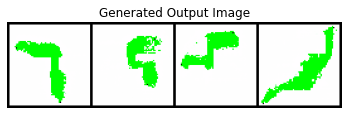

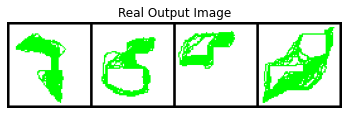

:::::::::::::::::  Epoch 10  :::::::::::::::::
::::::::::: Generator loss: 15.722 :::::::::::
::::::::: Discriminator loss: 0.136 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

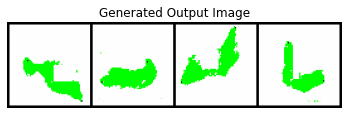

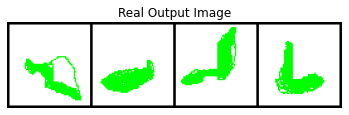

:::::::::::::::::  Epoch 11  :::::::::::::::::
::::::::::: Generator loss: 15.875 :::::::::::
::::::::: Discriminator loss: 0.135 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

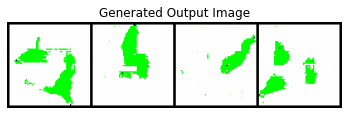

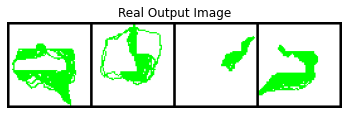

:::::::::::::::::  Epoch 12  :::::::::::::::::
::::::::::: Generator loss: 16.101 :::::::::::
::::::::: Discriminator loss: 0.120 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

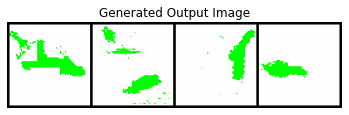

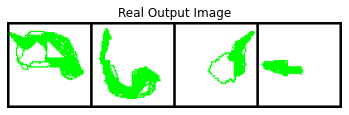

:::::::::::::::::  Epoch 13  :::::::::::::::::
::::::::::: Generator loss: 16.379 :::::::::::
::::::::: Discriminator loss: 0.104 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

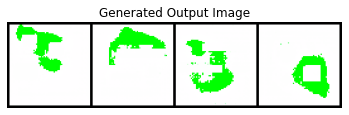

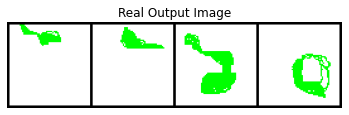

:::::::::::::::::  Epoch 14  :::::::::::::::::
::::::::::: Generator loss: 16.458 :::::::::::
::::::::: Discriminator loss: 0.110 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

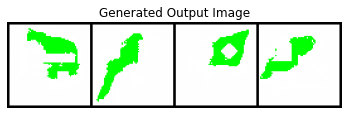

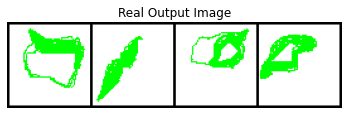

:::::::::::::::::  Epoch 15  :::::::::::::::::
::::::::::: Generator loss: 16.301 :::::::::::
::::::::: Discriminator loss: 0.116 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

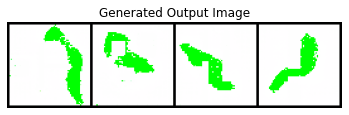

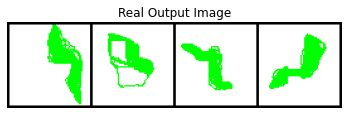

:::::::::::::::::  Epoch 16  :::::::::::::::::
::::::::::: Generator loss: 16.525 :::::::::::
::::::::: Discriminator loss: 0.105 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

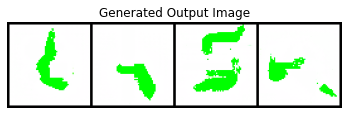

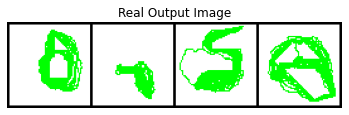

:::::::::::::::::  Epoch 17  :::::::::::::::::
::::::::::: Generator loss: 16.789 :::::::::::
::::::::: Discriminator loss: 0.095 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

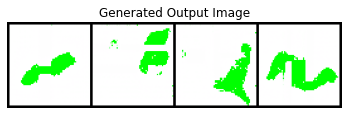

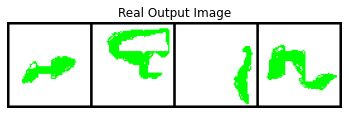

:::::::::::::::::  Epoch 18  :::::::::::::::::
::::::::::: Generator loss: 16.797 :::::::::::
::::::::: Discriminator loss: 0.099 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

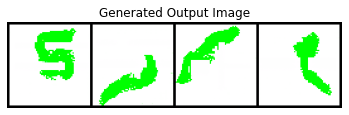

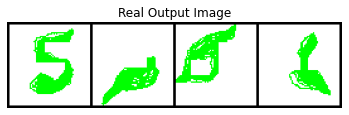

:::::::::::::::::  Epoch 19  :::::::::::::::::
::::::::::: Generator loss: 17.085 :::::::::::
::::::::: Discriminator loss: 0.099 :::::::::


  0%|          | 0/1000 [00:00<?, ?it/s]

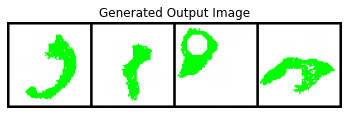

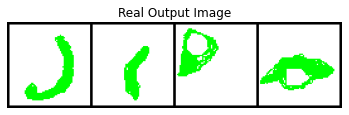

:::::::::::::::::  Epoch 20  :::::::::::::::::
::::::::::: Generator loss: 16.922 :::::::::::
::::::::: Discriminator loss: 0.100 :::::::::


In [20]:
trainer.fit(traingen, epochs=20, device=device)


In [21]:
#torch.save(generator.cpu().state_dict(), 'pixgenerator.pth')